# Business Decision Research

### Introduction
DQLab Sport Center is a store that sells various sports needs such as jackets, clothes, bags, and shoes. In the early of 2019, the store manager recruited a junior data analyst to help him in solving the problem at his store, which is the decline in customers returning to his store. In this project, we are the junior data analyst that will analyze the store's transaction data throughout the years.

### Data Preparation
Import the csv files name "data_retail.csv" as pandas DataFrames and examine them. After previewing the data, we will continue to the data cleansing so the data can be used for further analysis.

In [1]:
# Import file and library
import pandas as pd
df = pd.read_csv("data_retail.csv", sep=';')
#Preview the data
print(df.head())
print(df.info())

   no  Row_Num  Customer_ID Product  First_Transaction  Last_Transaction  \
0   1        1        29531   Jaket      1466304274396     1538718482608   
1   2        2        29531  Sepatu      1406077331494     1545735761270   
2   3        3       141526     Tas      1493349147000     1548322802000   
3   4        4       141526   Jaket      1493362372547     1547643603911   
4   5        5        37545  Sepatu      1429178498531     1542891221530   

   Average_Transaction_Amount  Count_Transaction  
0                     1467681                 22  
1                     1269337                 41  
2                      310915                 30  
3                      722632                 27  
4                     1775036                 25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   no       

We can see that the column "First_Transaction" and "Last_Transaction" have a int64 data type instead of datetime, hence we will convert the values into datetime format

In [2]:
# "First_Transaction" column
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
# "Last_Transaction" column
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin = '1970-01-01')
# Checking for the final data type
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   no                          100000 non-null  int64         
 1   Row_Num                     100000 non-null  int64         
 2   Customer_ID                 100000 non-null  int64         
 3   Product                     100000 non-null  object        
 4   First_Transaction           100000 non-null  datetime64[ns]
 5   Last_Transaction            100000 non-null  datetime64[ns]
 6   Average_Transaction_Amount  100000 non-null  int64         
 7   Count_Transaction           100000 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 6.1+ MB
None


#### Checking for churn customers
The manager explained that a customer is no longer called a customer(churn) when they have not done any transaction in the store again up to the last six months from the latest available data update. Therefore, we have to know when the last transaction was done and continue to classify the customers status.

In [3]:
# Last transaction in the dataframe
print(max(df['Last_Transaction']))

2019-02-01 23:57:57.286000128


Since the latest transaction was on February 1, 2019, it means that churn customers are those who have not done any transaction from August 1, 2018.

In [4]:
# Classify customers who have churn status or not using boolean
df.loc[df['Last_Transaction'] <= '2018-08-01', 'is_churn'] = True 
df.loc[df['Last_Transaction'] > '2018-08-01', 'is_churn'] = False
# Previewing the data
df.head()

,no,Row_Num,Customer_ID,Product,First_Transaction,Last_Transaction,Average_Transaction_Amount,Count_Transaction,is_churn
0,1,1,29531,Jaket,2016-06-19 02:44:34.396000000,2018-10-05 05:48:02.608000000,1467681,22,False
1,2,2,29531,Sepatu,2014-07-23 01:02:11.493999872,2018-12-25 11:02:41.269999872,1269337,41,False
2,3,3,141526,Tas,2017-04-28 03:12:27.000000000,2019-01-24 09:40:02.000000000,310915,30,False
3,4,4,141526,Jaket,2017-04-28 06:52:52.546999808,2019-01-16 13:00:03.911000064,722632,27,False
4,5,5,37545,Sepatu,2015-04-16 10:01:38.530999808,2018-11-22 12:53:41.529999872,1775036,25,False


It can be noticed that the "no" and "Row_Num" column do not provide any relevant and important data, so we can delete those columns.

In [5]:
del df['no']
del df['Row_Num']

### Exploratory Analysis


After the data is well-prepared, we will continue with data analysis in order to investigate any patterns or anomalies from the data with the help of summary statistics and graphical representations. 

#### Customer acquisition by year
We will create a data visualitation for the trend of customer acquisition that happened throughout the years using bar chart. To ease the visualization process, we will first create new columns name "Year_First_Transaction" and "Year_Last_Transaction" that contain the value of year for every value in the "First_Transaction" and "Last_Transaction" column.

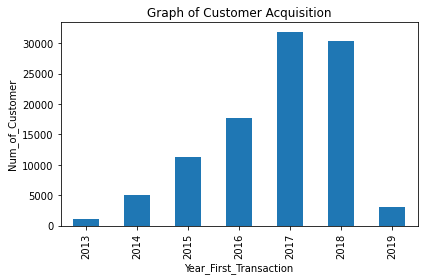

In [6]:
# Creating "Year_First_Transaction" column
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
# Creating "Year_Last_Transaction" column
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year
# Customer acquisition bar chart
import matplotlib.pyplot as plt
df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Graph of Customer Acquisition')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

#### Transaction by Year
Next we will see how many transactions that have happened in each year that will be visualized using bar chart

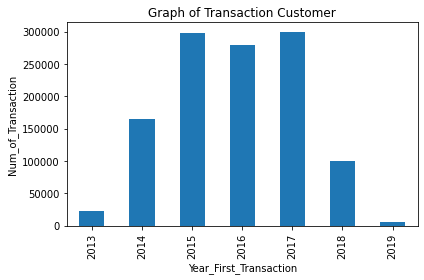

In [7]:
import matplotlib.pyplot as plt

plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Graph of Transaction Customer')
plt.xlabel('Year_First_Transaction')
plt.ylabel('Num_of_Transaction')
plt.tight_layout()
plt.show()

#### Average transaction amount by year
It is also important to analyze the average transaction amount for each product every year. This will help the store manager to know what product is categorized as the best seller product and how is the market segmentation in the store. We will use seaborn pointplot to visualize the transaction for each product, which are baju(clothes), jaket(jackets), sepatu(shoes), and tas(bags).

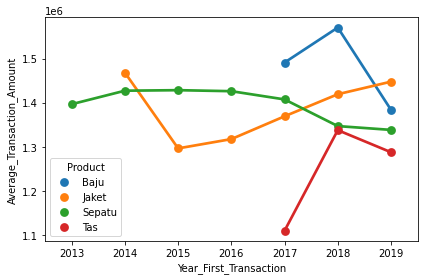

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
sns.pointplot(data=df.groupby(['Product', 'Year_First_Transaction']).mean().reset_index(),
x='Year_First_Transaction', y='Average_Transaction_Amount', hue='Product')
plt.tight_layout()
plt.show()

#### Churned customer proportion for each product
After we have gained insights from the product, the next step we will do is to do analysis on the customers. First, we will see how is the proportion of churned customer for each product using the pie chart. "True" value refers to churned customers while "False" value refers the otherwise.

<Figure size 432x288 with 0 Axes>

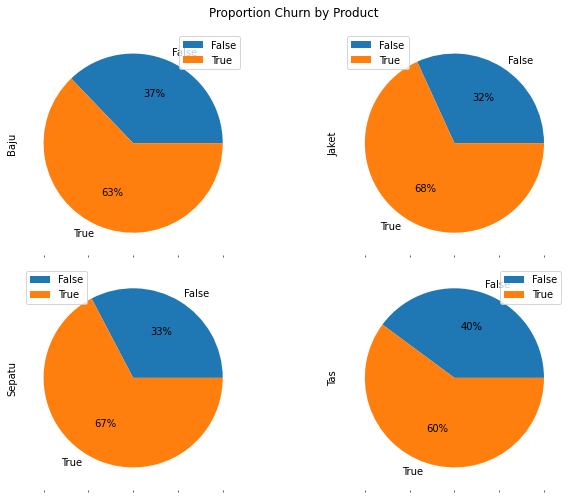

In [9]:
import matplotlib.pyplot as plt
plt.clf()
# Pivoting the data using pivot_table
df_piv = df.pivot_table(index='is_churn', 
                        columns='Product',
                        values='Customer_ID', 
                        aggfunc='count', 
                        fill_value=0)
# Proportion of churn by product
plot_product = df_piv.count().sort_values(ascending=False).head(5).index
# Plotting the pie chart
df_piv = df_piv.reindex(columns=plot_product)
df_piv.plot.pie(subplots=True,
                figsize=(10, 7),
                layout=(-1, 2),
                autopct='%1.0f%%',
                title='Proportion Churn by Product')
plt.tight_layout()
plt.show()

#### Distribution of transaction amount category
The next thing to do is to create a new column name "Count_Transaction_Group" that will categorize the customers based on their transaction frequency. Then we can visualize the distribution using bar chart.

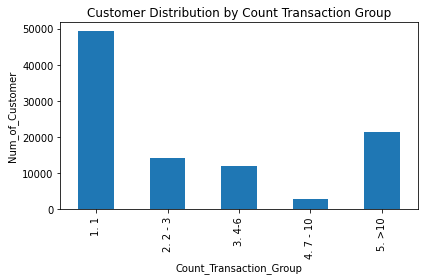

In [10]:
import matplotlib.pyplot as plt
plt.clf()
# Create a function that will categorize the customers
def func(row):
    if row['Count_Transaction'] == 1:
        val = '1. 1'
    elif (row['Count_Transaction'] > 1 and row['Count_Transaction'] <= 3):
        val ='2. 2 - 3'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='3. 4-6'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='4. 7 - 10'
    else:
        val ='5. >10'
    return val

# Create the "Count_Transaction_Group" column
df['Count_Transaction_Group'] = df.apply(func, axis=1)
# Visualize the data
df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Count_Transaction_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()


#### Distribution of average transaction amount category
After we get the the information regarding distribution of customers based on their transaction frequency, next we can also examine the distribution of customers based on their average spendings. Using the same method, we will first create a category column name "Average_Transaction_Amount_Group" and continue to visualize the distribution using bar chart.

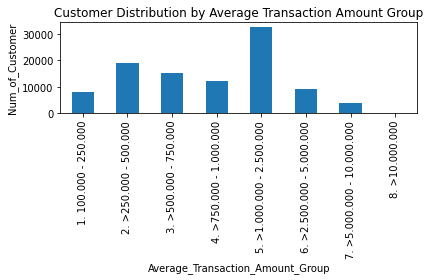

In [11]:
import matplotlib.pyplot as plt
plt.clf()
# Create a function that will categorize the customers
def f(row):
    if (row['Average_Transaction_Amount']>=100000 and row['Average_Transaction_Amount']<=250000):
        val ='1. 100.000 - 250.000'
    elif (row['Average_Transaction_Amount']>250000 and row['Average_Transaction_Amount']<=500000):
        val ='2. >250.000 - 500.000'
    elif (row['Average_Transaction_Amount']>500000 and row['Average_Transaction_Amount']<=750000):
        val ='3. >500.000 - 750.000'
    elif (row['Average_Transaction_Amount']>750000 and row['Average_Transaction_Amount']<=1000000):
        val ='4. >750.000 - 1.000.000'
    elif (row['Average_Transaction_Amount']>1000000 and row['Average_Transaction_Amount']<=2500000):
        val ='5. >1.000.000 - 2.500.000'
    elif (row['Average_Transaction_Amount']>2500000 and row['Average_Transaction_Amount']<=5000000):
        val ='6. >2.500.000 - 5.000.000'
    elif (row['Average_Transaction_Amount']>5000000 and row['Average_Transaction_Amount']<=10000000):
        val ='7. >5.000.000 - 10.000.000'
    else:
        val ='8. >10.000.000'
    return val

# Create the "Average_Transaction_Amount_Group"
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)
# Visualize the data
df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Average Transaction Amount Group')
plt.xlabel('Average_Transaction_Amount_Group')
plt.ylabel('Num_of_Customer')
plt.tight_layout()
plt.show()

### Modelling

#### Feature Columns and Target
In this part, we will determine the feature columns of the dataset that we have and the "Average_Transaction_Amount", "Count_Transaction", and "Year_Diff" will be selected. However, since the last column does not exist yet, we will first create the column and then assign the dataset with these feature columns as independent variable X. For the dependent variable y, of course it will be the target which is whether a customer has a churn status.

In [19]:
# Create "Year_Diff" column
df['Year_Diff'] = df['Year_Last_Transaction'] - df['Year_First_Transaction']
# Name of the feature columns
feature_columns = ['Average_Transaction_Amount', 'Count_Transaction', 'Year_Diff']
# Feature variable
X = df[feature_columns] 
# Target variable
y = df['is_churn']
y = y.astype('int')

Next, we will split independent variable X and dependent variable y into training and testing where the testing is 25% of the entire data entry.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Train, predict, and evaluate
We will create a model using logistic regression then initiate the model and fit. Furthermore we will also evaluate the model using confusion matrix.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Inisiasi model logreg
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train, y_train)

# Predict model
y_pred = logreg.predict(X_test)

# Evaluasi model menggunakan confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cnf_matrix)

Confusion Matrix:
 [[    1  8330]
 [    3 16666]]


#### Confusion matrix visualization
The visualization of confusion matrix can be represented using heatmap from the seaborn library.

<Figure size 432x288 with 0 Axes>

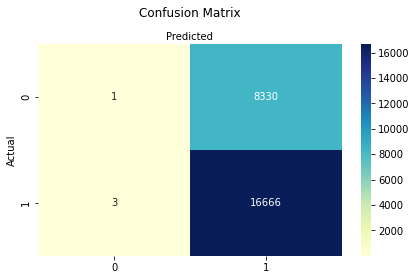

In [22]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.clf()
# name  of classes
class_names = [0, 1] 
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

The last step of this project is to calculate the accuracy, precision, and recall value between the real target value and predicted target value.

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate the accuracy, precision, and recall value
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Precision:',precision_score(y_test, y_pred, average='micro'))
print('Recall   :', recall_score(y_test, y_pred, average='micro'))

Accuracy : 0.66668
Precision: 0.66668
Recall   : 0.66668
